In [27]:
import requests
import csv
from datetime import datetime
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot
import matplotlib

In [28]:
url_page = 'http://www.bolsamadrid.es/esp/aspx/Indices/Resumen.aspx'
id_table = 'ctl00_Contenido_tblÍndices'
path = 'bolsa_ibex35.csv'

page = requests.get(url_page).text
soup = BeautifulSoup(page, "lxml")

name = ""
info = ""
nroFila = 0
table = soup.find("table", {'id': 'ctl00_Contenido_tblÍndices' })
for fila in table.find_all("tr"):    
    nroCelda=0
    for celda in fila.find_all('td'): 
        if nroCelda==0:
            name=celda.text      

        if nroCelda== 3:    
            info=celda.text
        nroCelda+=1
    nroFila+=1

In [29]:
    with open(path, 'a', newline='', encoding='utf-8') as csv_file:   
        writer = csv.writer(csv_file)
        writer.writerow([name, info, datetime.now()])    #Abre el archivo y escribe cada fila en forma de list para que el archivo csv lo detecte
    csv_file.close()

In [30]:
    df = pd.read_csv(path)     #Con la libreria pandas guardo el archivo en formato de Tabla
    headerList= ["Name" , "Porcentaje", "Fecha"]  
    df.columns = headerList
    
    df.to_csv(path, index=False)    #Le agrego un header con pandas

    df = df.sort_values(["Porcentaje"], ascending=True)     #A la tabla antes hecha la ordeno y la guardo
    df

,Name,Porcentaje,Fecha
22,IBEX 35® Impacto Div,-,2021-09-09 00:07:27.431002
35,IBEX 35® Protective Put,"-0,09",2021-09-09 00:07:27.435990
65,Índice ITX Apalancado X3,"-0,10",2021-09-09 00:07:27.446960
34,IBEX 35® PutWrite,"-0,12",2021-09-09 00:07:27.435990
36,IBEX 35® Venta de Strangle,"-0,14",2021-09-09 00:07:27.436985
...,...,...,...
12,IBEX 35® Inverso X5,"3,13",2021-09-09 00:07:27.427012
72,Índice BBVA Inverso X3,"3,96",2021-09-09 00:07:27.449951
13,IBEX 35® Inverso X10,"6,32",2021-09-09 00:07:27.427012
76,Índice BBVA Inverso X5,"6,44",2021-09-09 00:07:27.452943


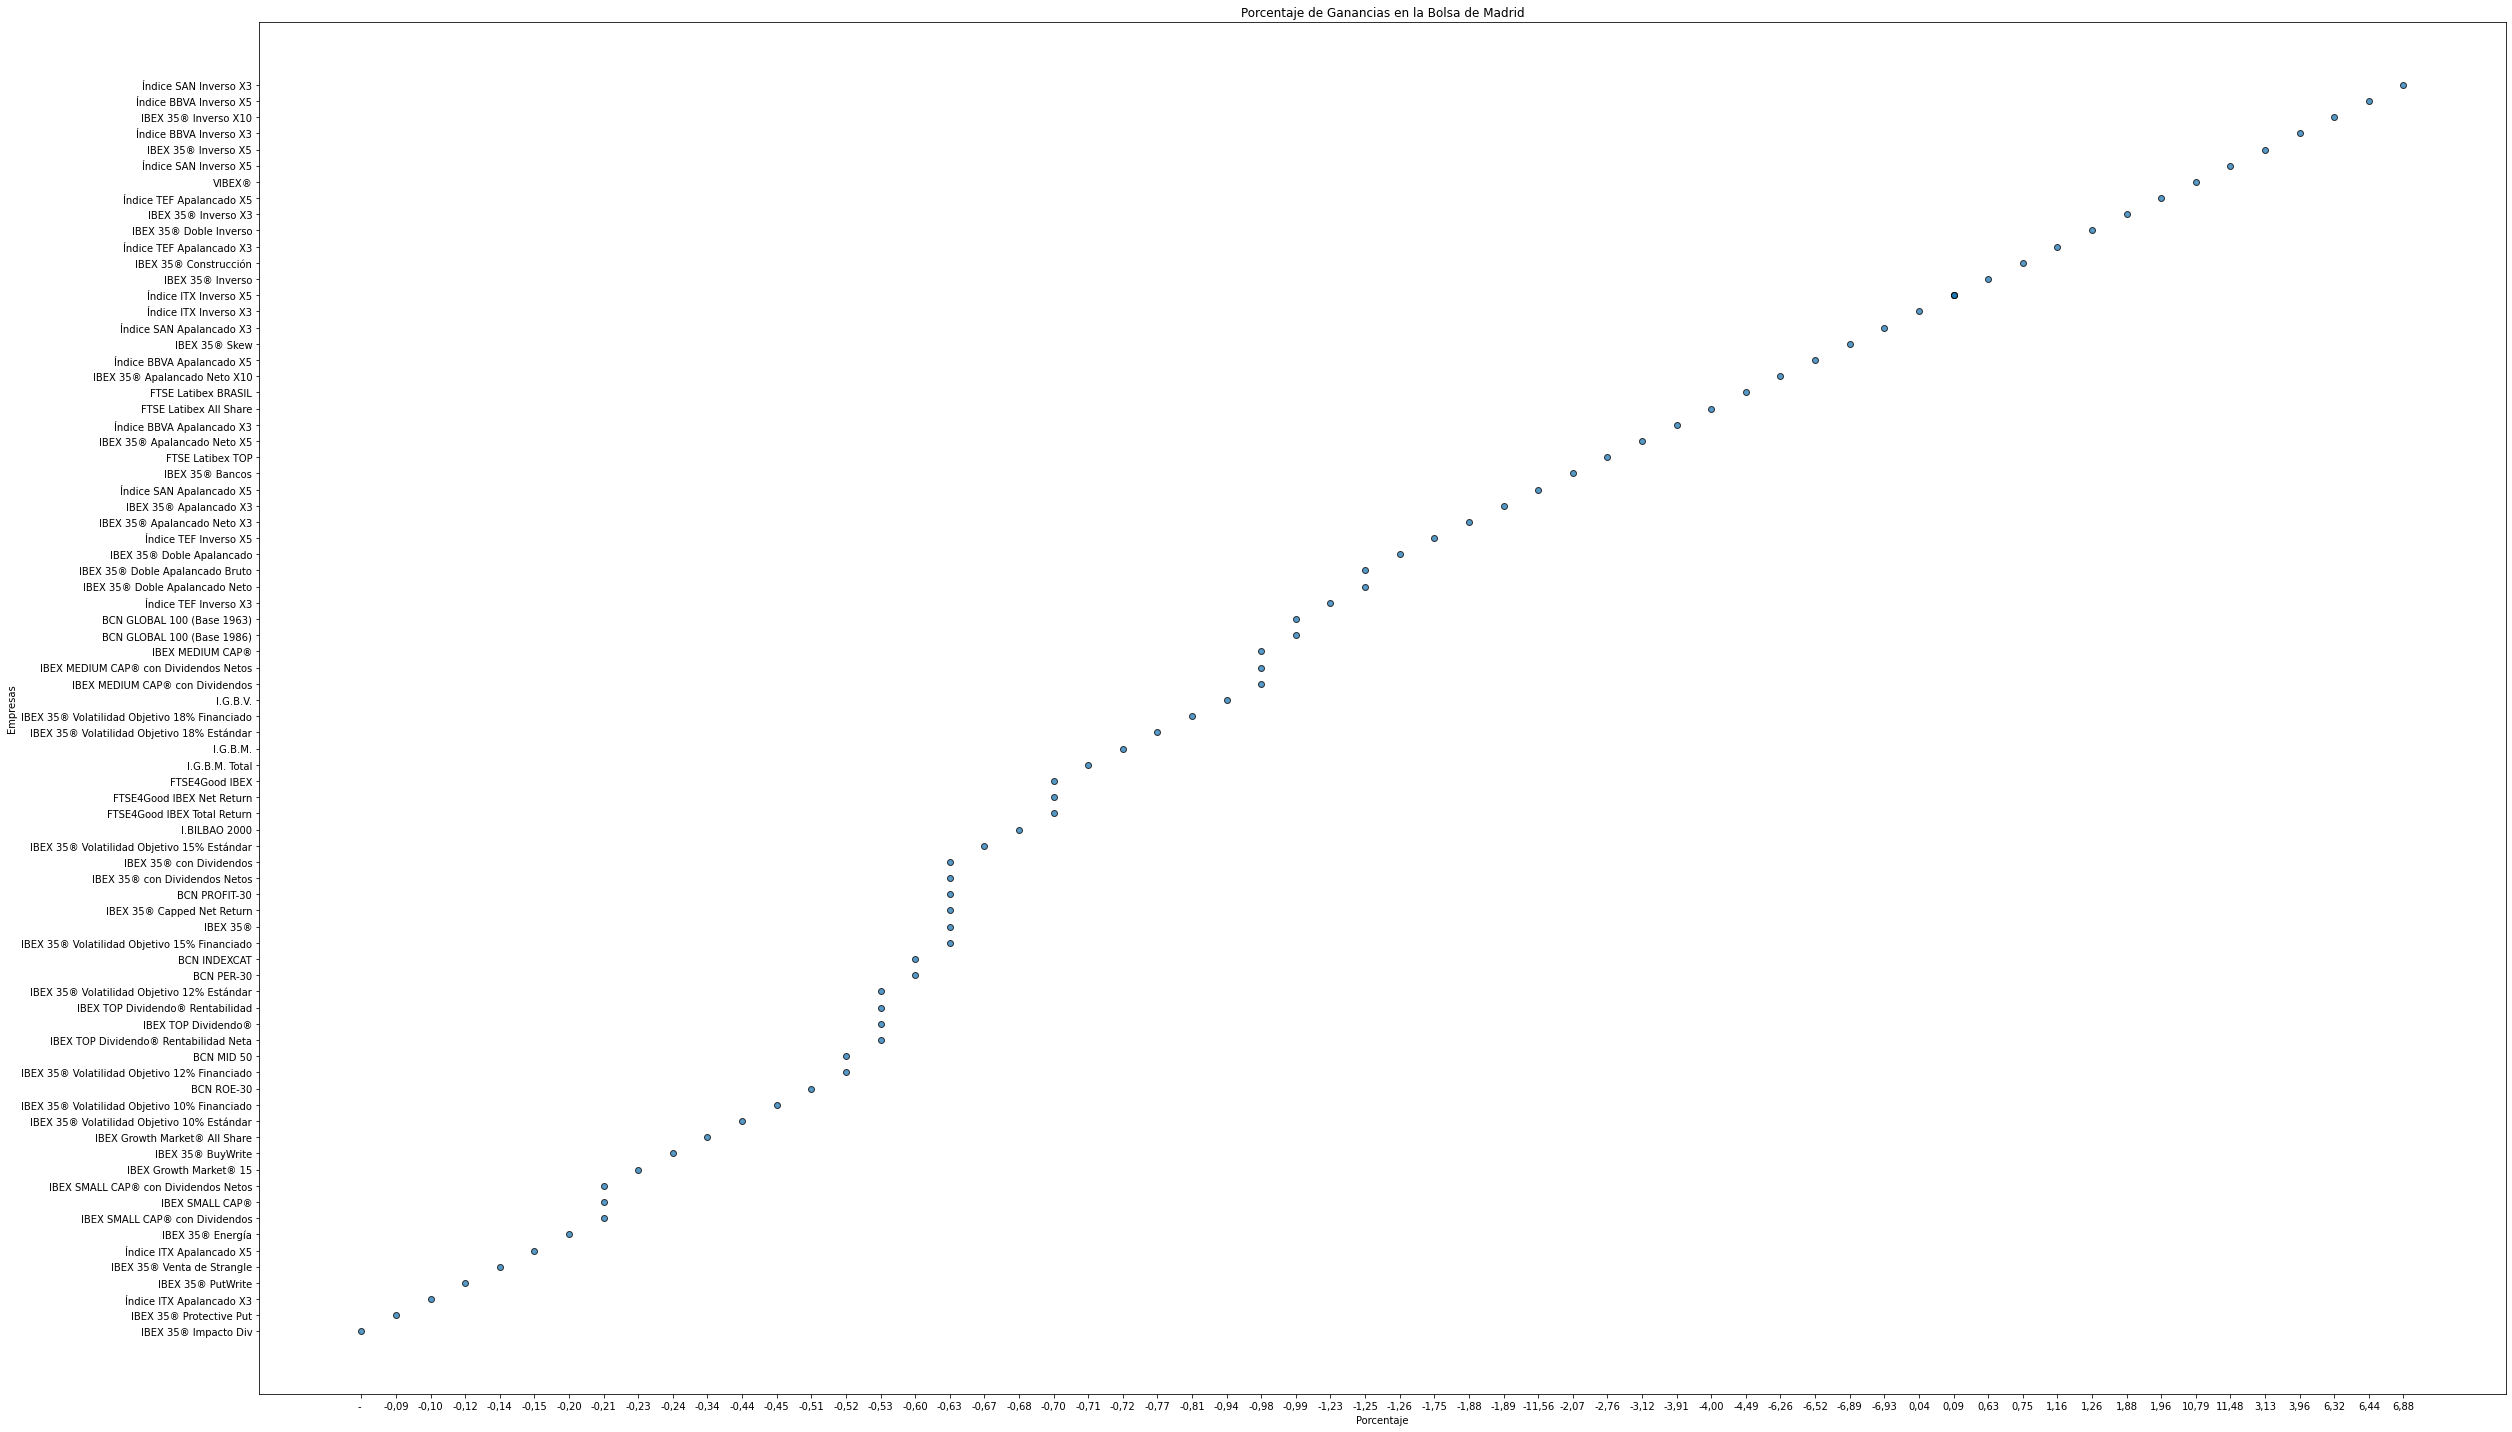

In [32]:


    names = df["Name"]
    porcentajes = df["Porcentaje"]

    matplotlib.rcParams["figure.figsize"] =30 , 15
    pyplot.scatter(porcentajes, names, edgecolors="black", linewidths=1,alpha=0.75)
    pyplot.title("Porcentaje de Ganancias en la Bolsa de Madrid")
    pyplot.xlabel("Porcentaje")
    pyplot.ylabel("Empresas")

    pyplot.tight_layout()
    pyplot.show()